# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [146]:
# import libraries here
import pandas as pd
import numpy as np
import os

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [147]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [148]:
# your answer here-1st way
employee.groupby('Department').agg({'Salary':'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [149]:
# your answer here-2nd way
employee.pivot_table(index=["Department"], values=["Salary"], aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [150]:
# your answer here
employee.pivot_table(index=["Department","Title"], values=["Salary"], aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [151]:
# your answer here
employee.pivot_table(index=["Title"], values=["Salary","Years"])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [152]:
# your answer here
employee.pivot_table(index=["Department"], values=["Salary","Name"],aggfunc={'Salary':'mean','Name':'count'})

,Name,Salary
Department,,
HR,3,45.00
IT,4,48.75
Sales,2,55.00


#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [153]:
# your answer here
result = employee.pivot_table(index=["Department",'Title'], values=["Salary"],aggfunc={'median',min,max,'std'})
result
#on remarque que lorsqu'il n'y a qu'un seul emplyoyé pour une fonction, le résultat qui s'affiche pour le std est 'NaN'

Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0       NaN
Sales      associate   55.0   55.0  55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [154]:
# your answer here
employee.pivot_table(index=["Department","Title"], values=["Salary"],aggfunc={'median',min,max,'std'}, fill_value='1 seul employé')


Salary                             
                        max median   min             std
Department Title                                        
HR         VP          70.0   70.0  70.0  1 seul employé
           analyst     35.0   32.5  30.0         3.53553
IT         VP          70.0   70.0  70.0  1 seul employé
           analyst     35.0   32.5  30.0         3.53553
           associate   60.0   60.0  60.0  1 seul employé
Sales      associate   55.0   55.0  55.0               0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [155]:
# your answer here
employee.pivot_table(index='Department',aggfunc={'Salary':sum, 'Name':'count'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [156]:
# your answer here
employee.pivot_table(index=['Department','Title'],aggfunc={'Years':sum, 'Salary':'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [157]:
# your answer here--Your custom function here
def remove_outliers(values):
    mid_quantiles = values.quantile([.25, .75])
    return np.mean(mid_quantiles)

In [158]:
# your answer here
employee.pivot_table(index = 'Department', values="Salary", aggfunc= [np.mean, remove_outliers])        

,mean,remove_outliers
,Salary,Salary
Department,,
HR,45.00,42.500
IT,48.75,48.125
Sales,55.00,55.000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [159]:
# your answer here
fitbit=pd.read_csv('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [160]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
Date                      367 non-null object
Calorie burned            367 non-null int64
Steps                     367 non-null int64
Distance                  367 non-null float64
Floors                    367 non-null int64
Minutes Sedentary         367 non-null float64
Minutes Lightly Active    367 non-null int64
Minutes Fairly Active     367 non-null int64
Minutes Very Active       367 non-null int64
Activity Calories         367 non-null int64
MinutesOfSleep            367 non-null int64
MinutesOfBeingAwake       367 non-null int64
NumberOfAwakings          367 non-null int64
LengthOfRestInMinutes     367 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 40.3+ KB


In [127]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [128]:
# your answer here
corr_act = fitbit['Minutes Very Active'].corr(fitbit['Steps'])
corr_act

0.5714518481062605

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

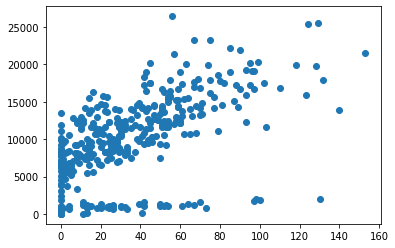

In [129]:
# your answer here
import matplotlib.pyplot as plt
#plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Very Active'])
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [130]:
# your comment here
#il semble qu'il y a une corrélation entre faire beaucoup de pas et le nb de minutes très active mais cette corrélation n'est pas forte.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [131]:
# your answer here
corr_sed = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
corr_sed

0.07690608062990092

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

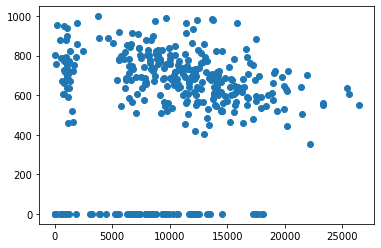

In [132]:
# your answer here
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Sedentary'])

In [133]:
# Your comment here
#on ne peut pas vraiment dire qu'il y a une relation linéraire entre un nb de pas important et les minutes de sédentarité

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [134]:
# your answer here
corr_sed = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
corr_sed

0.13098565950836388

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

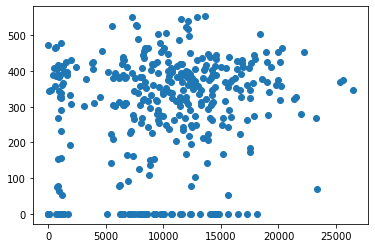

In [135]:
# your answer here
plt.scatter(x=fitbit['Steps'], y=fitbit['MinutesOfSleep'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [136]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column].corr()

In [137]:
#Print cor_fit
cor_fit.style.background_gradient(cmap='coolwarm').set_precision(2)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1,0.26,0.13,0.13,0.2,0.011
Steps,0.26,1,0.31,0.077,0.57,0.13
Floors,0.13,0.31,1,0.058,0.4,0.069
Minutes Sedentary,0.13,0.077,0.058,1,0.11,0.2
Minutes Very Active,0.2,0.57,0.4,0.11,1,0.11
MinutesOfSleep,0.011,0.13,0.069,0.2,0.11,1


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [138]:
# your answer here
cor_fit.sort_values('Steps',ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [139]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [140]:
#Print time_grades
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116fa4828>,
      dtype=object)

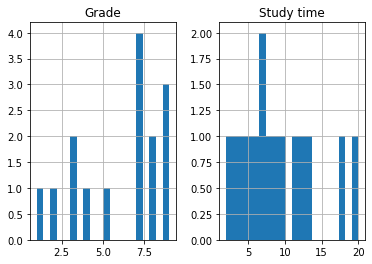

In [141]:
# your answer here
time_grades.hist(bins=20)

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [142]:
# your answer here-Pearson 
time_grades.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [143]:
## your answer here-Spearman
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

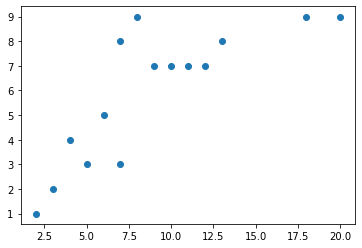

In [144]:
# your answer here
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])

In [145]:
#your comment here
#si on travaille plus 7,5h meilleure est la note

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here
